In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

from research_utils.database.database import Database

## Network Concentration as a Function of Size

In [2]:
database = Database()

In [19]:
sql = """
SELECT a.organization, a.package, gini_coefficient,
	   avg_clustering, avg_min_path, ks_pval,
        stakeholder_count, issue_count
FROM (
	SELECT organization, package, gini_coefficient,
           avg_clustering, avg_min_path, ks_pval
	FROM open_source.stakeholder_networks
    WHERE crowd_pct > .5
) a
INNER JOIN (
	SELECT organization, package, 
	COUNT(DISTINCT user_id) AS stakeholder_count,
	COUNT(DISTINCT issue_number) AS issue_count
	FROM open_source.issue_comments
	GROUP BY organization, package
) b
ON (a.package = b.package
AND a.organization = b.organization)
"""

In [20]:
df = pd.read_sql(sql, database.connection)

(0.3, 0.75)

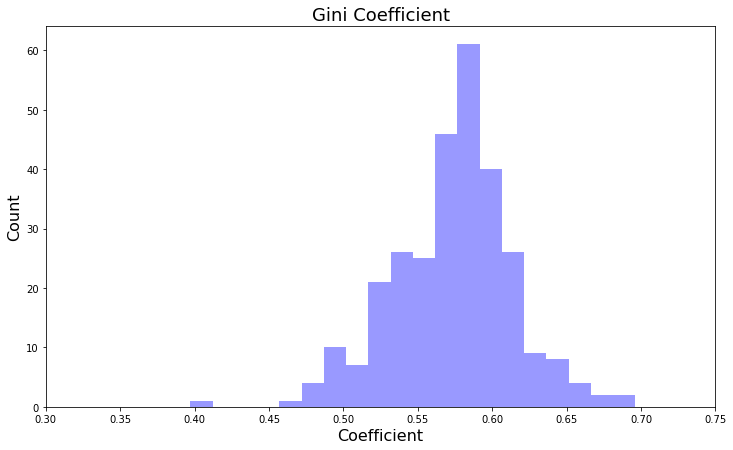

In [21]:
plt.figure(figsize=(12, 7))
sns.distplot(df['gini_coefficient'], kde=False, color='blue', bins=20)
plt.title('Gini Coefficient', fontsize=18)
plt.xlabel('Coefficient', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0.3,.75])

Text(0, 0.5, 'Gini Coefficient')

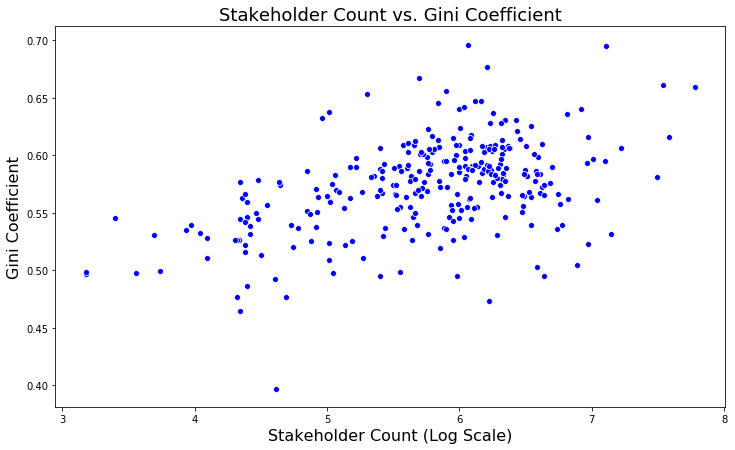

In [22]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=np.log(df['stakeholder_count']), y=df['gini_coefficient'], color='blue')
plt.title('Stakeholder Count vs. Gini Coefficient', fontsize=18)
plt.xlabel('Stakeholder Count (Log Scale)', fontsize=16)
plt.ylabel('Gini Coefficient', fontsize=16)

Text(0, 0.5, 'Gini Coefficient')

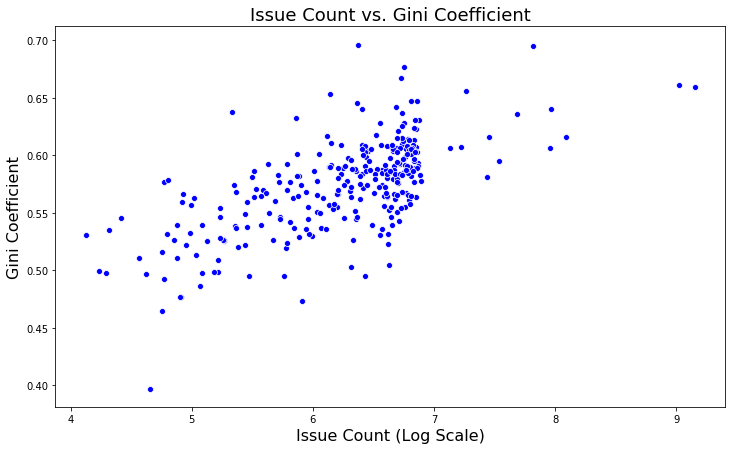

In [23]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=np.log(df['issue_count']), y=df['gini_coefficient'], color='blue')
plt.title('Issue Count vs. Gini Coefficient', fontsize=18)
plt.xlabel('Issue Count (Log Scale)', fontsize=16)
plt.ylabel('Gini Coefficient', fontsize=16)

Text(0, 0.5, 'Avg Shortest Path')

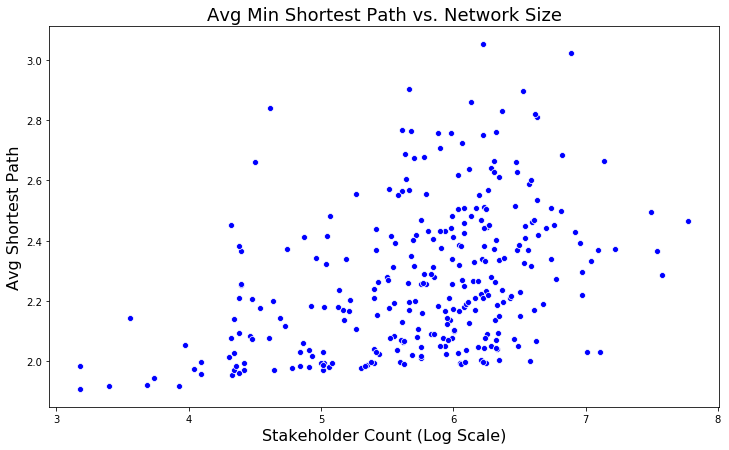

In [24]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=np.log(df['stakeholder_count']), y=df['avg_min_path'], color='blue')
plt.title('Avg Min Shortest Path vs. Network Size', fontsize=18)
plt.xlabel('Stakeholder Count (Log Scale)', fontsize=16)
plt.ylabel('Avg Shortest Path', fontsize=16)

(0, 1)

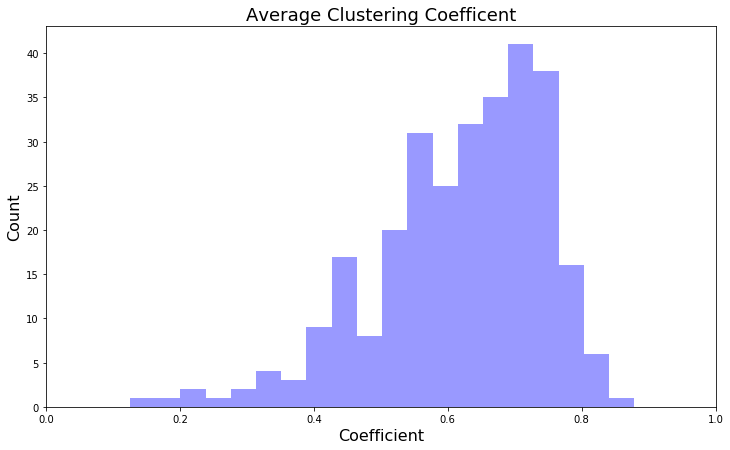

In [25]:
plt.figure(figsize=(12, 7))
sns.distplot(df['avg_clustering'], kde=False, color='blue', bins=20)
plt.title('Average Clustering Coefficent', fontsize=18)
plt.xlabel('Coefficient', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0,1])

(1.4, 3.1)

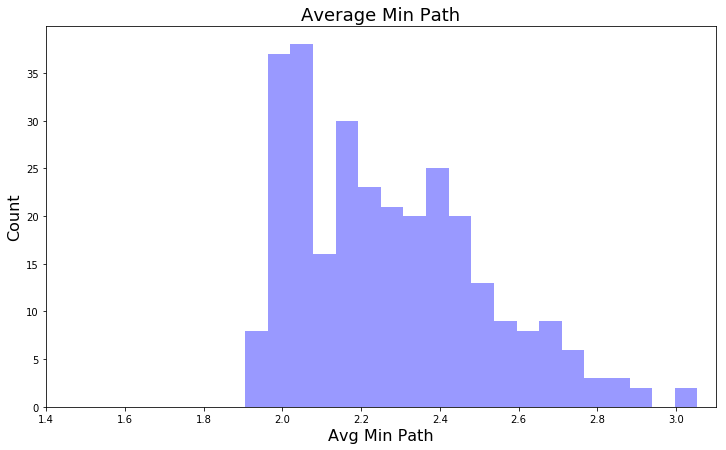

In [26]:
plt.figure(figsize=(12, 7))
sns.distplot(df['avg_min_path'], kde=False, color='blue', bins=20)
plt.title('Average Min Path', fontsize=18)
plt.xlabel('Avg Min Path', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([1.4,3.1])